In [1]:
from scipy import *
from scipy import special
import matplotlib.pyplot as plt
import numpy as np
import weave

In [2]:
def f(x):
    return pow(x, (1 + special.j0(x))) / np.sqrt((1 + (100 * x * x)) * (1 - x))

In [3]:
with open("spline.c","r") as file:
	scode=file.read()

## Question 2

### (a) Convert the function to a table, spaced 0.05 apart, sampling it from 0.1 to 0.9.

In [4]:
x = np.arange(0.1, 0.95, 0.05)
y = f(x)

### (b) In python, plot this function and determine its general behaviour. Is it analytic in that region? What is the radius of convergence at x = 0 and at x = 0.9?

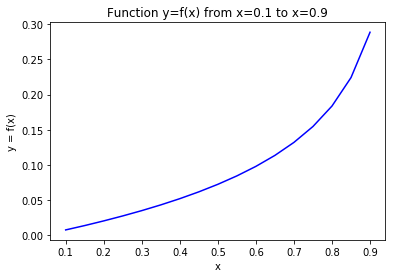

In [5]:
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Function y=f(x) from x=0.1 to x=0.9")
plt.plot(x, y, 'b')
plt.show()

### (c) Use spline interpolation on the function in Eq. (1). Use y′′ = 0 at the boundaries, and obtain the spline coefficients and hence interpolate as above. How does the error vary with the number of uniformly spaced spline points? How many points are required to achieve six digit accuracy?

In [92]:
n = 19

In [93]:
xa=np.linspace(0.1,0.90, n)
ya=f(xa)
y2a=np.zeros(xa.shape)
xx=np.linspace(0.1,0.9,3*n)
yt=f(xx)
yy=np.zeros(xx.shape)
u=np.zeros(xa.shape)

In [98]:
code="""
	#include <math.h>
	int i;
	double xp;
	spline(x,y,n,1.0e30,1.0e30,y2a,u);
	for(i=0; i<3*n; i++){
		xp=xx[i];
		splint(x,y,y2a,n,xp,yy+i);
	}
"""

weave.inline(code,["x","y","n","y2a","u","xx","yy"],support_code=scode,extra_compile_args=["-g"],compiler="gcc")

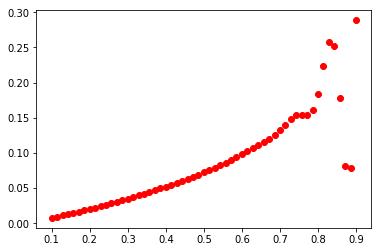

In [99]:
plt.plot(xx, yy, 'ro')

0.18789396116510285


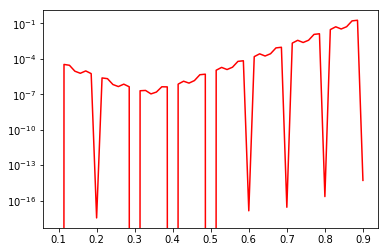

In [100]:
errs = abs(yy-yt)
plt.semilogy(xx, errs, 'r')
print(max(errs))

In [97]:
num_samples = [i for i in range(10, 41)]
ni = 100
max_errs = []

In [ ]:
for n in num_samples:
    xa=np.linspace(0.1,0.90, n)
    ya=f(xa)
    y2a=np.zeros(xa.shape)
    xx=np.linspace(0.10,0.90,ni)
    yt = f(xx)
    yy=np.zeros(xx.shape)
    u=np.zeros(xa.shape)

    code="""
    	#include <math.h>
    	int i;
    	double xp;
    	spline(x,y,n,1.1e30,1.1e30,y2a,u);
    	for(i=0; i<ni; i++){
    		xp=xx[i];
    		splint(x,y,y2a,n,xp,yy+i);
    	}
    """

    weave.inline(code,["x","y","n","y2a","u","xx","yy", "ni"],support_code=scode,extra_compile_args=["-g"],compiler="gcc")

    max_errs.append(max(abs(yy-yt)))

In [ ]:
print(list(enumerate(max_errs)))